In [212]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integ
from scipy.fft import fft,ifft
from IPython.display import HTML
from matplotlib.animation import FuncAnimation


In [213]:
xmax = 8
dx = 0.01
xs = np.arange(-xmax,xmax+dx,dx,dtype =np.complex64)
N = np.size(xs)
dp = 2*np.pi/N/dx
p_max = dp*N/2
ps = np.arange(-p_max,p_max,dp,dtype = np.complex64)
dt = 0.01

In [214]:
GS = np.pi**(-0.25)*np.exp(-xs**2/ 2)*(1+np.sqrt(2)*xs)*1/np.sqrt(2)

c:\Users\Emil\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


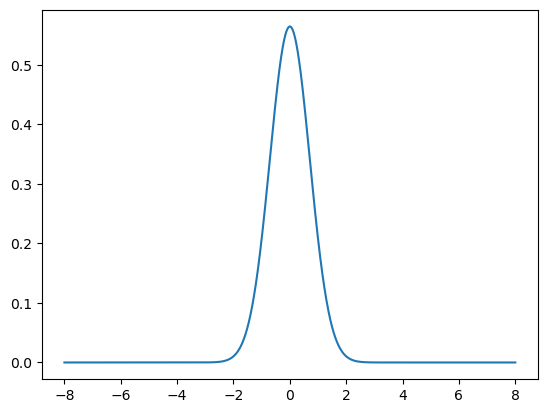

In [215]:
plt.plot(xs,GS**2)

(1.0000317122295637+0j)
(100, 1601)


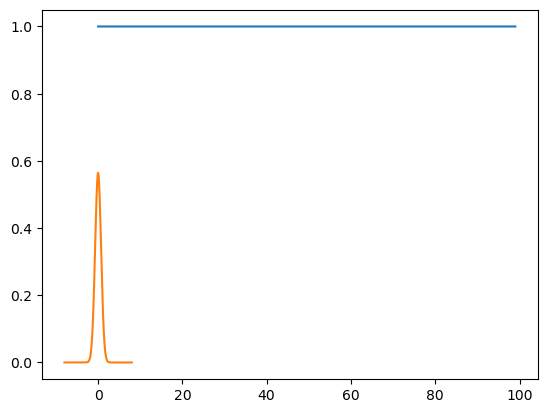

In [216]:
ns = np.arange(0,N,1)
F = GS*np.exp(-1j*(-p_max)*xs[0])*np.exp(-1j*(-p_max)*dx*ns)

T = 0.5*ps**2
Vx = 0.5*xs**2
def split_step_propagate(fftstate,T,V,dt):
    h = fftstate*np.exp(-1j*dt/2*T)
    f = ifft(h)
    f = f*np.exp(-1j*V*dt)
    h = fft(f)
    h = h*np.exp(-1j*dt/2*T)
    return h
t0 = 0
tf = 10
t = t0
WaveSquares = []
ImWave = []
ReWave = []
i = 0
tests = []
H = fft(F)
while t < tf:
    t+=dt
    i+=1
    H = split_step_propagate(H,T,Vx,dt)
    if i % 10 == 0:
        CurrentWaveSquare = np.abs(ifft(H)*np.exp(1j*(-p_max)*xs[0])*np.exp(1j*(-p_max)*dx*ns))**2
        ImWave.append(np.imag(ifft(H)*np.exp(1j*(-p_max)*xs[0])*np.exp(1j*(-p_max)*dx*ns)))
        ReWave.append(np.real(ifft(H)*np.exp(1j*(-p_max)*xs[0])*np.exp(1j*(-p_max)*dx*ns)))
        WaveSquares.append(CurrentWaveSquare)
        tests.append(integ.trapz(np.abs(ifft(H)*np.exp(1j*(-p_max)*xs[0])*np.exp(1j*(-p_max)*dx*ns))**2,xs))
fig,ax = plt.subplots()
ax.plot(tests)
    

plt.plot(xs,np.abs(ifft(H)*np.exp(1j*(-p_max)*xs[0])*np.exp(1j*(-p_max)*dx*ns))**2)
print(integ.trapz(np.abs(ifft(H)*np.exp(1j*(-p_max)*xs[0])*np.exp(1j*(-p_max)*dx*ns))**2,xs))
print(np.shape(WaveSquares))


c:\Users\Emil\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


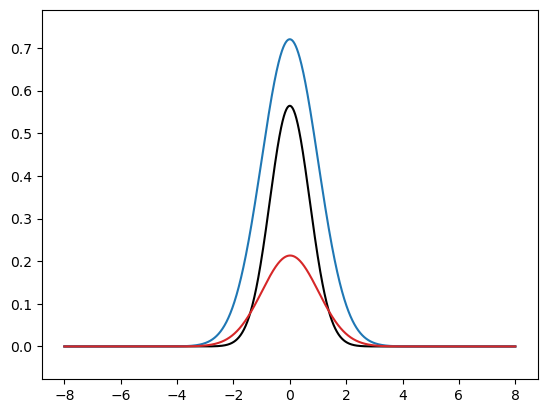

In [217]:
#%matplotlib widget
fig, ax = plt.subplots()
graph, = ax.plot(xs,WaveSquares[0],color = 'k')
im_line, = ax.plot(xs,ImWave[0],color = 'tab:blue')
re_line, = ax.plot(xs,ReWave[0],color = 'tab:red')
def update(i):
    graph.set_data(xs,WaveSquares[i])
    im_line.set_data(xs,ImWave[i])
    re_line.set_data(xs,ReWave[i])
    return graph,im_line,re_line
anim = FuncAnimation(fig,  # Figuren animationen skal lave på
                     update,  # funktionen der opdaterer figuren hver frame
                     frames=len(WaveSquares),  # antal frames
                     interval=50,  # antal ms mellem hver frame
                     blit = True).to_jshtml()
HTML(anim)